(floatingpoint)=
# Floating Point Arithmetic

This is a chapter dedicated to floating point arithmetic in an attempt to summarize and clarify the math and concepts involved.

The main resource I have used for this is [What every Computer Scientist Should Know about Floating Point Arithmetic][FPA] 
which was written by David Goldberg.

[FPA]: https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

(roundingerror)=
## Rounding Error

**Problem**
: How to represent infintely many real numbers using a finite binary representation?

This is going to leave gaps between the finite representations and require approximation.

Most computations involving real numbers produce quantities that cannot truly be represented in a finite amount of bits.
The canonical example of this is:

$$ 0.1 = 0.00011001100110011... $$

So a decimal number as simple as $0.1 = 10^{-1} = \frac{1}{10}$ leads to an infinitely repeating sequence that must eventually be truncated
in order to be computed. This has had some severe real-world implications involving a [missile defense system][missile].

[missile]: http://www-users.math.umn.edu/~arnold/disasters/Patriot-dharan-skeel-siam.pdf


(fpr)=
### Floating Point Representation

What does a floating point representation of a number consist of:

$$ \pm d_{0}.d_{1}d_{2}d_{3}...d_{p-1} \times \beta^{e} \quad d \in \beta, \, e \in \mathcal{Z} $$

- A signed ($\pm$) digit string of a certain length in a given base (radix) $\beta$ called the **mantissa**, **significand**, or **coefficient**.
  - The length of the significand is called the **precision** and is given the variable $p \in \mathcal{N}$
  - Within the significand is the **radix point position (the location of the "point/dot")**, which in a normalized number is to the right of the most
    significant digit (leftmost digit in significand)    
    
- An integer exponent $e \in [e_{min}<0, e_{max}>0]$ applied to the base $\beta$ which is often called the _characteristic_ or _scale_ and modifies the magnitude of the significand. 

```{important}
Any number converted to floating point representation in base $\beta$ will roughly have the form:
$d_{0}.d_{1}d_{2}d_{3}...d_{p-1} \times \beta^{e}$
and in this case the exponentiated base operates analogously to $10^{n}$ in decimal, shifting the point throughought
the number, hence the "floating point"
```

Since there are $\beta^{p}$ possible significands and $e_{max}-e_{min} +1$ exponents,  a floating point number can be expressed in:

$$ \log_{2}[e_{max}-e_{min} +1] + \log_{2}[\beta^{p}] + 1 \; \text{bits} $$

**Normalized Number** is one in which the most significant digit is not zero. In the case of binary this means the left-most digit is 1. The IEEE convention
for floating point numbers specifies that the point lies directly to the right of the most significant digit. This ensures unique representations of numbers.

<br />

Quick question. How many positive values can we represent with a normalized number that has $\beta=2$, $p=3$, and $e \in [-1, 2]$?  

Since there are 4 possible combinations, ${1.00, 1.01, 1.10, 1.11}$ and **4 exponents = 4 shifts**, we have $4*4=16$ possible values.


Here are those values on a number line:

Text(0.0, 0.2, 'Binary Numbers on Real Number Line')

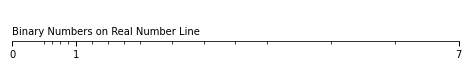

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

bin_list = ['1.00', '1.01', '1.10', '1.11']
total_bin_list = []
exp_list = [-1, 0, 1, 2]
for e in exp_list:
    for b in bin_list:
        if e == 0:
            total_bin_list.append(b)
        else:
            temp = list(b)
            replace_value = temp[e+1]
            temp[e+1] = '.'
            temp[1] = replace_value
            new = ''.join(temp)
            total_bin_list.append(new)

bin_values = []
for i in total_bin_list:
    curr_sum = 0.0
    l, r = i.split('.')[0], i.split('.')[1]        
    
    for d in range(len(l)):
        curr_sum += float(l[d])*2**(len(l)-d-1)
    for d in range(len(r)):
        curr_sum += float(r[d])*2**(-1*(d+1))       
    
    bin_values.append(curr_sum) 

def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)

plt.figure(figsize=(8, 6))
n = 8

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0,1,7]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.array(bin_values)
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.2, "Binary Numbers on Real Number Line", fontsize=10,
        transform=ax.transAxes)